# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [3]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


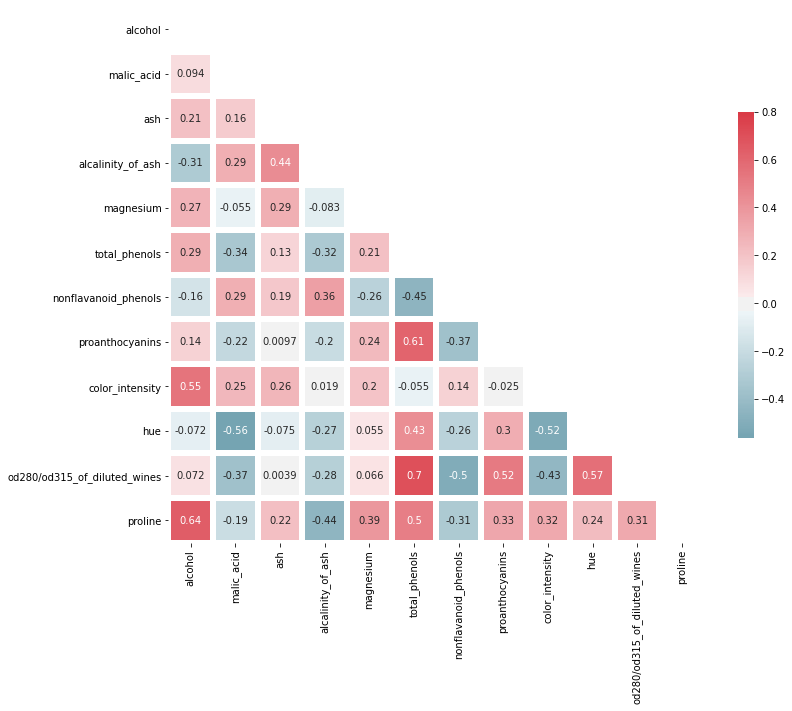

In [4]:
def correlation_matrix(df, drop=None):
    if drop: 
        corr = df.drop(columns=drop).corr().copy()
    else:
        corr = df.corr().copy()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=5, cbar_kws={"shrink": .5}, annot=True)
plt.figure(figsize=(12,12))
correlation_matrix(X,drop='flavanoids') # This column has a very high correlation

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [5]:
from sklearn.preprocessing import StandardScaler
X_clean = X.drop(columns='flavanoids').copy()
X_clean_scaled = StandardScaler().fit_transform(X_clean)

In [6]:
from sklearn.cluster import KMeans
labelsn8= KMeans(n_clusters=8).fit(X_clean_scaled).labels_
df = pd.DataFrame(X_clean_scaled)
df['label'] = labelsn8
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,7
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,7
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,7
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,7
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [7]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labelsn8)

-0.10697765616358404

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [8]:
labelsn5= KMeans(n_clusters=5).fit(X_clean_scaled).labels_
df = pd.DataFrame(X_clean_scaled)
df['label'] = labelsn8
silhouette_score(X, labelsn5)

0.09770048024129595

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [9]:
labelsn3= KMeans(n_clusters=3).fit(X_clean_scaled).labels_
df = pd.DataFrame(X_clean_scaled)
df['label'] = labelsn8
silhouette_score(X, labelsn3)

0.20419759645172572

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

/home/rh/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/rh/.local/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9e65200f0>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

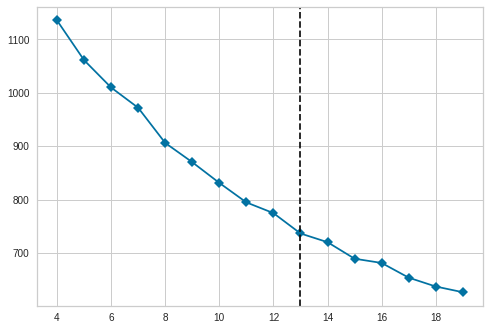

In [10]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20), metric="distortion", timings=False)
visualizer.fit(X_clean_scaled)

/home/rh/.local/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9e64a28d0>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

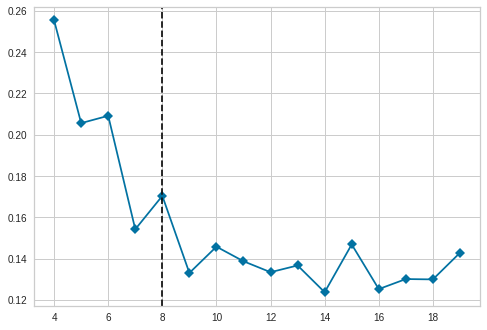

In [11]:
visualizer = KElbowVisualizer(model, k=(4,20), metric="silhouette", timings=False)
visualizer.fit(X_clean_scaled)

/home/rh/.local/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/rh/.local/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/rh/.local/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/rh/.local/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarni

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f1c1b7f0>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)

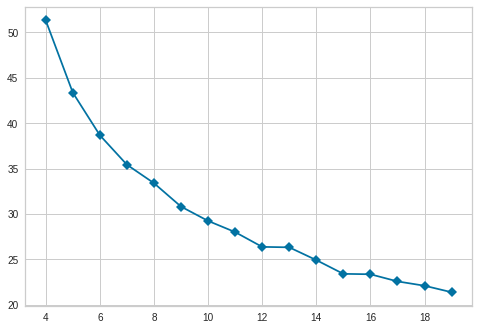

In [12]:
visualizer = KElbowVisualizer(model, k=(4,20), metric="calinski_harabasz", timings=False)
visualizer.fit(X_clean_scaled)

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [13]:
from sklearn.cluster import AgglomerativeClustering
X['labelsAgg'] = AgglomerativeClustering().fit(X_clean_scaled).labels_
model = AgglomerativeClustering()

/home/rh/.local/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/rh/.local/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/rh/.local/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/rh/.local/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarni

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f1f79a58>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)

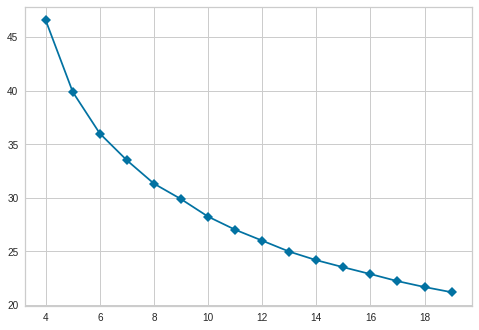

In [14]:
visualizer = KElbowVisualizer(model, k=(4,20), metric="calinski_harabasz", timings=False)
visualizer.fit(X_clean_scaled)

/home/rh/.local/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f1beb400>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

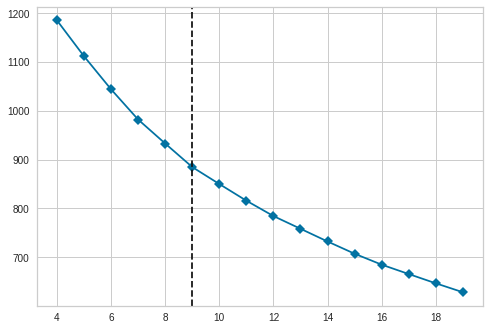

In [15]:
visualizer = KElbowVisualizer(model, k=(4,20), metric="distortion", timings=False)
visualizer.fit(X_clean_scaled)

/home/rh/.local/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f170e4a8>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

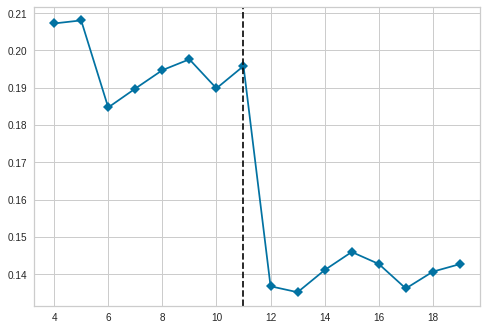

In [16]:
visualizer = KElbowVisualizer(model, k=(4,20), metric="silhouette", timings=False)
visualizer.fit(X_clean_scaled)

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [17]:
model = AgglomerativeClustering(n_clusters=11)
X['labelsAggN11'] = model.fit(X_clean_scaled).labels_
X['labelsKMN7']= KMeans(n_clusters=7).fit(X_clean_scaled).labels_
X.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labelsAgg,labelsAggN11,labelsKMN7
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2


In [24]:
def compare_clustering(data, features=None, labels=None, title=None):
    f,a= plt.subplots(1, len(labels), figsize=(10,5))
    #f.suptitle(' and '.join(features))
    for i in range(0,len(labels)):
        a[i].set_title(f'Model: {labels[i]}')
        a[i].set_xlabel(features[0])
        a[i].set_ylabel(features[1])
        current_labels = data[labels[i]]
        
        for cluster in current_labels.unique():
            cluster_data = data[data[labels[i]] == cluster].copy()
            a[i].scatter(cluster_data[features[0]], cluster_data[features[1]])

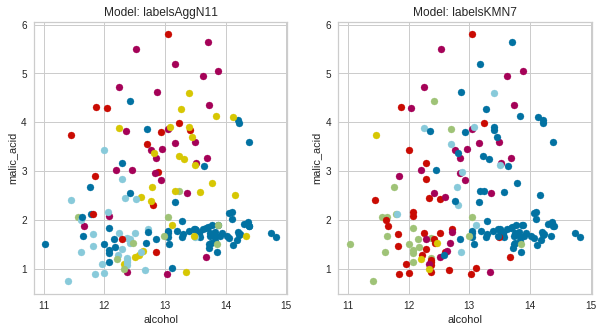

In [25]:
compare_clustering(X, features= ['alcohol', 'malic_acid'],
                       labels=  ['labelsAggN11','labelsKMN7'])

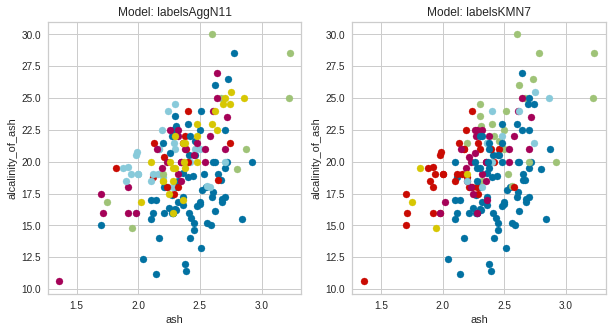

In [26]:
compare_clustering(X, features=  ['ash', 'alcalinity_of_ash'],
                       labels=  ['labelsAggN11','labelsKMN7'])

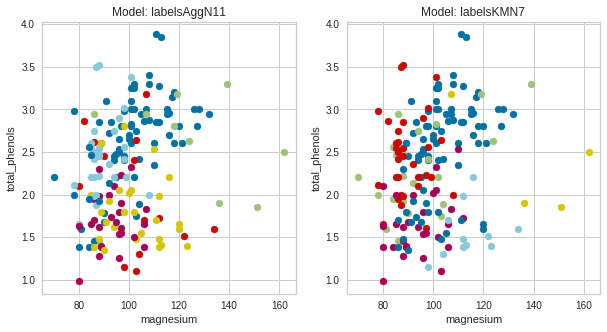

In [27]:
compare_clustering(X, features=  ['magnesium','total_phenols'],
                       labels=  ['labelsAggN11','labelsKMN7'])

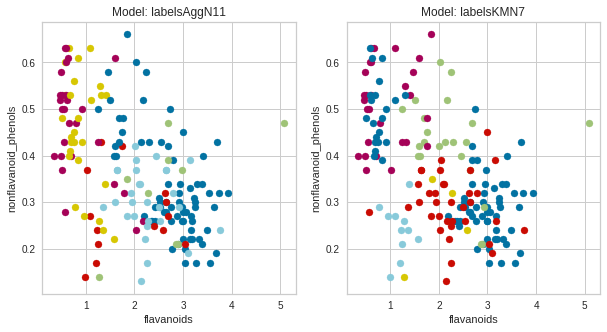

In [28]:
compare_clustering(X, features= [ 'flavanoids', 'nonflavanoid_phenols'],
                       labels=  ['labelsAggN11','labelsKMN7'])

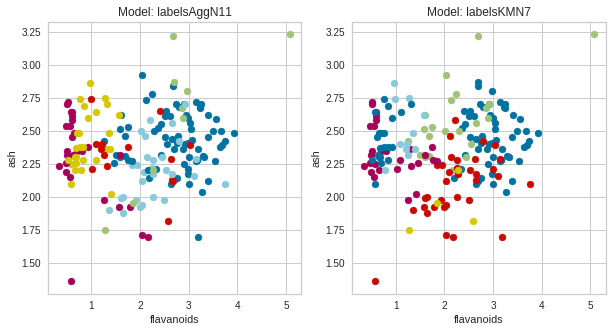

In [32]:
compare_clustering(X, features= [ 'flavanoids', 'ash'],
                       labels=  ['labelsAggN11','labelsKMN7'])

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
pca_model = pca.fit_transform(X)
pca_data = pd.DataFrame(pca_model, columns = X.columns)
pca_data[:,0]

TypeError: '(slice(None, None, None), 0)' is an invalid key

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.